# Image Filteration Using Convolution
## Project 1, APL703
### Soban Nasir Lone
### 2022AMY7554

In [95]:
import numpy as np
import matplotlib.pyplot as plt

Now we will import our image

In [96]:
img = plt.imread('itachi.jpg')
print(img)

[[[144 167 198]
  [144 167 198]
  [145 168 199]
  ...
  [165 184 214]
  [166 185 215]
  [167 186 216]]

 [[144 167 198]
  [144 167 198]
  [145 168 199]
  ...
  [166 185 215]
  [166 185 215]
  [167 186 216]]

 [[144 167 198]
  [144 167 198]
  [145 168 199]
  ...
  [166 185 215]
  [166 185 215]
  [167 186 216]]

 ...

 [[  2  11  28]
  [  2  11  28]
  [  2  11  28]
  ...
  [  4  11  29]
  [  4  11  29]
  [  4  11  29]]

 [[  2  11  28]
  [  2  11  28]
  [  2  11  28]
  ...
  [  3  10  28]
  [  3  10  28]
  [  3  10  28]]

 [[  2  11  28]
  [  2  11  28]
  [  2  11  28]
  ...
  [  3  10  28]
  [  3  10  28]
  [  3  10  28]]]


In [97]:
print(img.shape)

(1080, 1916, 3)


The shape of our image is 1080*1916 pixels wand the image is RGB.
We can view the image as:

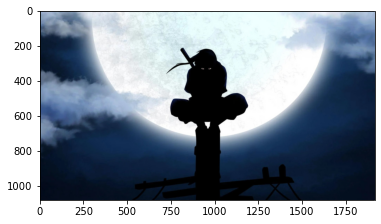

In [99]:
plt.imshow(img)

In [ ]:
m = img.shape[0]
n = img.shape[1]

Adding some amount of random Gaussian Noise to our image

In [100]:
img2 = img +300*(np.random.rand(m,n,3)-0.5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


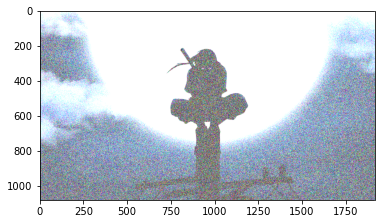

In [101]:
plt.imshow(img2)

## Convolution 
A convolution between an image matrix f = $\begin{bmatrix}
f_{ij} \end{bmatrix} $ and a filter matrix h = $\begin{bmatrix}
h_{kl} \end{bmatrix} $ is given by $g = foh $ such that:

   $ g_{ij} = \sum_{k}\sum_{l} f_{kl} \ h_{i-k+1,j-l+1} $

### Gaussian Blurring

Now we will define the Kernels that we would like to convolute with our image. 

A Gaussian Blurring Kernel is given by:
 $ K_{Gauss} = 1/8 \begin{bmatrix} 
0 & 1 & 0\\
1 & 4 & 1 \\
0 & 1 & 0
 \end{bmatrix} $

In [102]:
kernel = np.array([[0,1,0],[1,4,1],[0,1,0]])
k_gauss = 0.25 * kernel
k_gauss

array([[0.  , 0.25, 0.  ],
       [0.25, 1.  , 0.25],
       [0.  , 0.25, 0.  ]])

Pixels of a Gaussian Kernel can be visualized as:

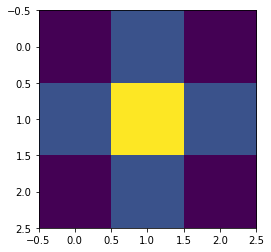

In [103]:
plt.imshow(k_gauss)

Let us define a generalised convolution function that takes in a 3x3 Kernel, the image matrix and it's shape and outputs the Convoluted Image and the Convoluted Matrix

In [122]:
#for 3*3. k is a matrix, img is image, m and are dim of img
def conv(k,m,n,img):
    f_img=np.zeros((m+2, n+2),dtype=np.float64)

    f_img[1:-1,1:-1]=img[:,:,0]

    f_out=np.zeros((m, n),dtype=np.float64)



    for i in range(1,m+1):

        for j in range(1,n+1):

   

            f_out[i-1,j-1] = f_img[i-1,j-1]*k[0,0] + f_img[i-1,j]*k[0,1] + f_img[i-1,j+1]*k[0,2] +f_img[i,j-1]*k[1,0] + f_img[i,j]*k[1,1] + f_img[i,j+1]*k[1,2]+ f_img[i+1,j-1]*k[2,0] + f_img[i+1,j]*k[2,1] + f_img[i+1,j+1]*k[2,2] 
  
  
    plt.imshow(f_out)
    print(f_out)

Applying the Convolution to our original image, we get:

[[216.   252.25 253.5  ... 289.25 290.5  250.25]
 [252.   288.25 289.75 ... 331.5  332.25 292.  ]
 [252.25 288.5  289.75 ... 331.5  332.25 291.75]
 ...
 [  3.5    4.     4.   ...   7.75   7.75   6.75]
 [  3.5    4.     4.   ...   6.25   6.25   5.5 ]
 [  3.     3.5    3.5  ...   5.25   5.25   4.5 ]]


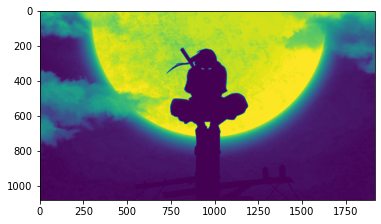

In [123]:
k = k_gauss


conv(k,m, n,img)

Applying Convolution to the noisy image

[[ 242.4432724   405.70155118  419.21326405 ...  277.74944913
   271.00109163  344.79426844]
 [  90.37945317  224.84655923  464.0153765  ...  340.37862353
   346.51265871  343.76581981]
 [ 158.95934058  189.26039183  345.22477636 ...  290.46447978
   230.71553251  312.70185551]
 ...
 [  25.91000631  -49.69249923   57.30182187 ...   95.1769842
   -40.87556185  -23.48265369]
 [  94.63006816   47.7754883    25.27628217 ...   28.90676515
    19.834754    -53.89497112]
 [-107.28805461  -85.18419372  -65.902244   ...  -81.54454169
   -10.98524075   53.60741964]]


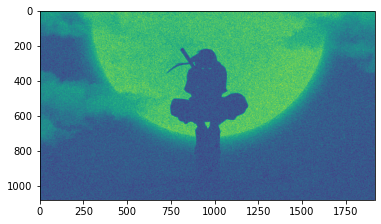

In [124]:
conv(k,m,n,img2)

### Applying Gaussian Blurring Twice

Since we want to apply the Gaussian Filter twice, we will apply the Convolution once, get the output image and then apply convolution on it again.
\
Note : We are performing the operation on the image with noise

In [125]:

f_img=np.zeros((m+2, n+2),dtype=np.float64)

f_img[1:-1,1:-1]=img2[:,:,0]

f_out=np.zeros((m, n),dtype=np.float64)



for i in range(1,m+1):

    for j in range(1,n+1):

   

        f_out[i-1,j-1] = f_img[i-1,j-1]*k[0,0] + f_img[i-1,j]*k[0,1] + f_img[i-1,j+1]*k[0,2] +f_img[i,j-1]*k[1,0] + f_img[i,j]*k[1,1] + f_img[i,j+1]*k[1,2]+ f_img[i+1,j-1]*k[2,0] + f_img[i+1,j]*k[2,1] + f_img[i+1,j+1]*k[2,2] 
  


print(f_out)

[[ 242.4432724   405.70155118  419.21326405 ...  277.74944913
   271.00109163  344.79426844]
 [  90.37945317  224.84655923  464.0153765  ...  340.37862353
   346.51265871  343.76581981]
 [ 158.95934058  189.26039183  345.22477636 ...  290.46447978
   230.71553251  312.70185551]
 ...
 [  25.91000631  -49.69249923   57.30182187 ...   95.1769842
   -40.87556185  -23.48265369]
 [  94.63006816   47.7754883    25.27628217 ...   28.90676515
    19.834754    -53.89497112]
 [-107.28805461  -85.18419372  -65.902244   ...  -81.54454169
   -10.98524075   53.60741964]]


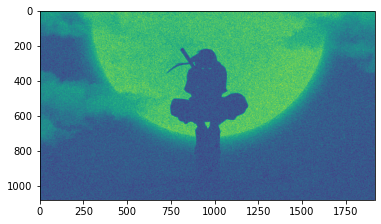

In [126]:
plt.imshow(f_out)

[[ 3.66463523e+02  6.27327325e+02  7.09624917e+02 ...  5.10636810e+02
   5.13265186e+02  4.98485996e+02]
 [ 2.46941746e+02  5.12185752e+02  8.06803775e+02 ...  6.87258040e+02
   6.42977926e+02  5.94768015e+02]
 [ 2.63636450e+02  4.04371360e+02  6.61017777e+02 ...  5.70969957e+02
   5.12239037e+02  5.45429168e+02]
 ...
 [ 2.40118519e+01 -2.61738703e+01  6.70583877e+01 ...  6.64615500e+01
  -6.56432947e+01 -6.26004660e+01]
 [ 8.62294282e+01  4.40329026e+01  4.45624598e+01 ...  1.23399293e+01
   6.22501856e-01 -4.14050911e+01]
 [-1.04926586e+02 -1.16537896e+02 -8.61943129e+01 ... -7.44300380e+01
  -1.30108328e+01  3.73873667e+01]]


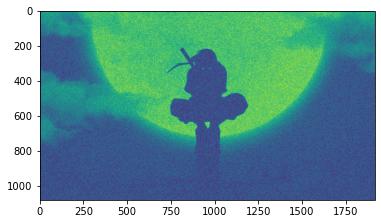

In [127]:

f_img=np.zeros((m+2, n+2),dtype=np.float64)

f_img[1:-1,1:-1]=f_out[:,:]

f_out1=np.zeros((m, n),dtype=np.float64)



for i in range(1,m+1):

    for j in range(1,n+1):

   

        f_out1[i-1,j-1] = f_img[i-1,j-1]*k[0,0] + f_img[i-1,j]*k[0,1] + f_img[i-1,j+1]*k[0,2] +f_img[i,j-1]*k[1,0] + f_img[i,j]*k[1,1] + f_img[i,j+1]*k[1,2]+ f_img[i+1,j-1]*k[2,0] + f_img[i+1,j]*k[2,1] + f_img[i+1,j+1]*k[2,2] 
  

plt.imshow(f_out1)
print(f_out1)

### A matrix that performs the same opertion:

Since Convolution is distributive, we can write:
$$ fo(goh) = (fog)oh $$

So we apply the Gaussian Blurring Filter to the Gaussian Blurring Filter and the Matrix thus obtained is the resultant matrix that is equivalent to performing the same convolution twice

In [128]:

f_img=np.zeros((3+2, 3+2),dtype=np.float64)

f_img[1:-1,1:-1]=k_gauss[:,:]

KGb_twice=np.zeros((3, 3),dtype=np.float64)



for i in range(1,3+1):

    for j in range(1,3+1):

   

        KGb_twice[i-1,j-1] = f_img[i-1,j-1]*k[0,0] + f_img[i-1,j]*k[0,1] + f_img[i-1,j+1]*k[0,2] +f_img[i,j-1]*k[1,0] + f_img[i,j]*k[1,1] + f_img[i,j+1]*k[1,2]+ f_img[i+1,j-1]*k[2,0] + f_img[i+1,j]*k[2,1] + f_img[i+1,j+1]*k[2,2] 
  
print(KGb_twice)


[[0.125 0.5   0.125]
 [0.5   1.25  0.5  ]
 [0.125 0.5   0.125]]


#### The Matrix that performs Gaussian Blurring Convolution Twice is shown as:

[[0.125 0.5   0.125]
 [0.5   1.25  0.5  ]
 [0.125 0.5   0.125]]


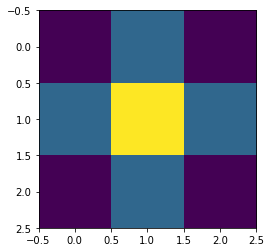

In [129]:
plt.imshow(KGb_twice)
print(KGb_twice)

The size of this Matrix is 3x3

The resulting Convolution is done:

[[ 363.79353978  633.41000031  689.64268335 ...  475.13907485
   507.81118731  508.66337723]
 [ 228.21749088  491.63513771  799.41211811 ...  658.74283608
   620.14323108  584.29679823]
 [ 233.57794074  378.28650805  613.43754889 ...  518.87782713
   485.71670904  511.71117523]
 ...
 [  29.16387066  -23.24725921   71.87216922 ...   70.53156721
   -51.95480547  -80.45387635]
 [  95.29514607   46.63596752   20.41749768 ...   21.78536815
    13.46905128  -44.90950187]
 [-118.47354812 -115.06173359  -84.71289909 ... -102.45907428
   -11.44290884   51.13661554]]


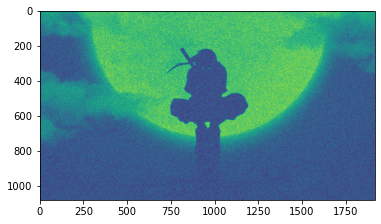

In [131]:
KG_twice = conv(KGb_twice,m,n,img2)

### Using a larger Gaussian Blurring Kernel

A 5x5 Gaussian Blurring Kernel is given by:
 $ K_{GLarge} = 1/80 \begin{bmatrix} 
0 & 1 & 2 & 1 & 0\\
1 & 4 & 8 & 4 & 1\\
2 & 8 & 16 & 8 & 2\\
1 & 4 & 8 & 4 & 1\\
0 & 1 & 2 & 1 & 0
\end{bmatrix} $

In [132]:
k_gl = np.array([[0, 1, 2, 1, 0] ,[1, 4, 8, 4, 1]
,[2, 8, 16, 8, 2]
,[1, 4, 8, 4, 1],
[0, 1, 2, 1, 0]]) 
k_Glarge = (1/80) * k_gl
k_Glarge

array([[0.    , 0.0125, 0.025 , 0.0125, 0.    ],
       [0.0125, 0.05  , 0.1   , 0.05  , 0.0125],
       [0.025 , 0.1   , 0.2   , 0.1   , 0.025 ],
       [0.0125, 0.05  , 0.1   , 0.05  , 0.0125],
       [0.    , 0.0125, 0.025 , 0.0125, 0.    ]])

Visualizing the pixels:

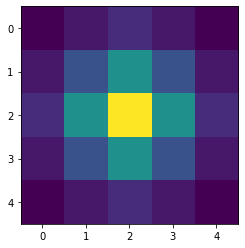

In [133]:
plt.imshow(k_Glarge)

[[ 50.96777973 101.57101303 107.67828444 ...  87.26536447  94.50875035
   37.47414462]
 [ 42.89661199  92.95581021  87.26785461 ...  73.28838961  88.73227043
   36.32531161]
 [ 32.41792249  61.52203046  97.46777899 ...  42.51631664  84.29988439
   36.701748  ]
 ...
 [ 13.07464258  14.18592404   2.47906661 ...   8.26650326 -14.51014899
   -8.33014963]
 [-14.025463   -13.68689654  -6.77201015 ...  -7.15488454   5.74060563
    4.09071582]
 [ -8.91223073  -8.5224717   -3.95355713 ...  -4.84691746   4.4115376
    2.68037098]]


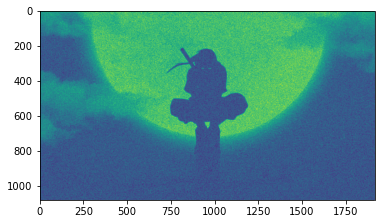

In [134]:
conv(k_Glarge, m,n, img2)

### Comparing the Gaussian Blur applied twice and the Gaussian Large Blur :

In [135]:
k = k_Glarge
f_img=np.zeros((m+2, n+2),dtype=np.float64)

f_img[1:-1,1:-1]=img2[:,:,0]

KG_large=np.zeros((m, n),dtype=np.float64)



for i in range(1,m+1):

    for j in range(1,n+1):

   

        KG_large[i-1,j-1] = f_img[i-1,j-1]*k[0,0] + f_img[i-1,j]*k[0,1] + f_img[i-1,j+1]*k[0,2] +f_img[i,j-1]*k[1,0] + f_img[i,j]*k[1,1] + f_img[i,j+1]*k[1,2]+ f_img[i+1,j-1]*k[2,0] + f_img[i+1,j]*k[2,1] + f_img[i+1,j+1]*k[2,2] 
  


KG_large

array([[ 50.96777973, 101.57101303, 107.67828444, ...,  87.26536447,
         94.50875035,  37.47414462],
       [ 42.89661199,  92.95581021,  87.26785461, ...,  73.28838961,
         88.73227043,  36.32531161],
       [ 32.41792249,  61.52203046,  97.46777899, ...,  42.51631664,
         84.29988439,  36.701748  ],
       ...,
       [ 13.07464258,  14.18592404,   2.47906661, ...,   8.26650326,
        -14.51014899,  -8.33014963],
       [-14.025463  , -13.68689654,  -6.77201015, ...,  -7.15488454,
          5.74060563,   4.09071582],
       [ -8.91223073,  -8.5224717 ,  -3.95355713, ...,  -4.84691746,
          4.4115376 ,   2.68037098]])

In [136]:
k = KGb_twice
f_img=np.zeros((m+2, n+2),dtype=np.float64)

f_img[1:-1,1:-1]=img2[:,:,0]

KG_twice=np.zeros((m, n),dtype=np.float64)



for i in range(1,m+1):

    for j in range(1,n+1):

   

        KG_twice[i-1,j-1] = f_img[i-1,j-1]*k[0,0] + f_img[i-1,j]*k[0,1] + f_img[i-1,j+1]*k[0,2] +f_img[i,j-1]*k[1,0] + f_img[i,j]*k[1,1] + f_img[i,j+1]*k[1,2]+ f_img[i+1,j-1]*k[2,0] + f_img[i+1,j]*k[2,1] + f_img[i+1,j+1]*k[2,2] 
  


KG_twice

array([[ 363.79353978,  633.41000031,  689.64268335, ...,  475.13907485,
         507.81118731,  508.66337723],
       [ 228.21749088,  491.63513771,  799.41211811, ...,  658.74283608,
         620.14323108,  584.29679823],
       [ 233.57794074,  378.28650805,  613.43754889, ...,  518.87782713,
         485.71670904,  511.71117523],
       ...,
       [  29.16387066,  -23.24725921,   71.87216922, ...,   70.53156721,
         -51.95480547,  -80.45387635],
       [  95.29514607,   46.63596752,   20.41749768, ...,   21.78536815,
          13.46905128,  -44.90950187],
       [-118.47354812, -115.06173359,  -84.71289909, ..., -102.45907428,
         -11.44290884,   51.13661554]])

In [141]:

for i in range(m):
    for j in range(n):
        diff = KG_twice[i][j]-KG_large[i][j]
        

In [142]:
diff

48.45624456127799

We observe that apllying the 5x5 Blurring Filter once has more of an effect than applying the 3x3 Blurring Filter twice

[[ 352822.15806032  568701.50312765  558126.11150049 ...  457075.68041535
   531027.13280134  277103.01309159]
 [ 451175.84621206  850610.33312483  848712.12867245 ...  700556.32492255
   786859.29864487  435968.54877462]
 [ 221650.24582576  556521.67401425  788645.76994526 ...  591640.11464143
   706120.98094779  402554.72673911]
 ...
 [ -41346.91792069  108119.92207413   16405.57457011 ...  -92748.04659832
  -138491.32184355 -107245.88266402]
 [ -15074.62350863  -23969.17970557  -37750.01053247 ...    8368.09819436
     6973.37724113  -11030.62861347]
 [  -2133.82408205  -19228.98586291  -11230.96870955 ...  -32768.57425788
    15202.6235557    -4634.26289578]]


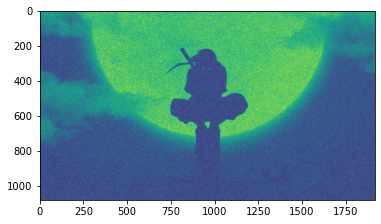

In [144]:
conv(KG_twice,m,n,img2)

[[ 4.74879272e+04  8.57258537e+04  8.96220495e+04 ...  7.15209743e+04
   7.56691937e+04  4.78986907e+04]
 [ 6.84775952e+04  1.23769157e+05  1.27134876e+05 ...  1.03741319e+05
   1.20282532e+05  7.29577113e+04]
 [ 3.45763037e+04  8.12689586e+04  1.24400426e+05 ...  9.34225821e+04
   1.05337019e+05  6.58341225e+04]
 ...
 [-3.33292297e+03  1.41626093e+04  5.25294201e+03 ... -9.60714426e+03
  -2.33984535e+04 -1.66531990e+04]
 [-2.79680407e+03 -2.63566329e+03 -5.48979772e+03 ... -8.72133094e+02
   5.50511705e+03 -2.07616804e+03]
 [ 5.27441946e+01 -3.30359601e+03 -2.76433382e+03 ... -4.80450168e+03
  -1.84678524e+03 -1.66886072e+02]]


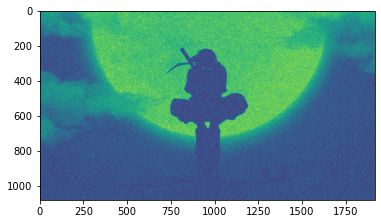

In [145]:
conv(KG_large,m,n,img2)

### Edge Detection Using Sobel Kernels


The two Sobel Kernels used for edge detections are given as:
 $ K_{Sobel1} = \begin{bmatrix} 
-1 & 0 & 1\\
-2 & 0 & 2 \\
-1 & 0 & 1
 \end{bmatrix} $ 
 and
 $ K_{Sobel2} = \begin{bmatrix} 
-1 & 2 & -1\\
 0 & 0 & 0 \\
 1 & 2 & 1
 \end{bmatrix} $
 

In [146]:
KS1 = np.array([[ -1, 0, 1],
[-2, 0, 2],
[-1, 0, 1]])
KS2 = np.transpose(KS1)
print("K Sobel 1:\n ",KS1)
print("K Sobel 2:\n ",KS2)

K Sobel 1:
  [[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
K Sobel 2:
  [[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]


The pixels of Horizontal and Vertical Sobels  can be visualized

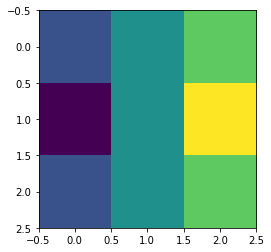

In [147]:

plt.imshow(KS1)

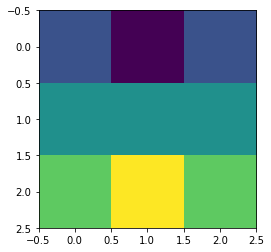

In [148]:
plt.imshow(KS2)

[[ 634.76625791  429.12216426 -140.8307436  ... -121.50655712
   222.74825617 -423.80753956]
 [ 493.15373687  698.27945517  229.90805765 ... -291.30650837
   204.22841165 -631.01277796]
 [ 274.99497182  495.92731692  440.6139088  ... -328.11973323
   266.88373395 -418.37650357]
 ...
 [-141.81703255  139.85300001  -13.20009737 ...   69.17845656
  -352.64421632  191.58499227]
 [ -22.0511563  -105.13310399   -2.48861086 ...  252.40714926
  -170.61944811  -30.12121082]
 [ -60.12394239   41.49939986   52.93078786 ...   64.13336385
   216.39147395   -9.07106598]]


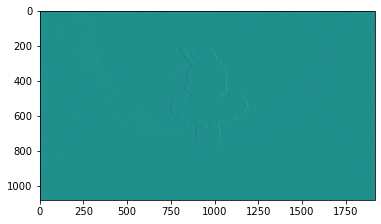

In [149]:
Sobel1 = conv(KS1,m,n,img2)

[[  62.53550592  406.23250003  858.79974407 ...  757.26239428
   755.0378569   566.58276773]
 [-289.84112707 -505.99335131 -318.66450319 ...   30.38405791
  -155.71120048 -192.98119423]
 [  69.18626173 -135.17241735 -314.14755256 ... -581.32727652
  -369.3899207   -56.82833027]
 ...
 [ 419.00232442  231.60162273  -78.82210117 ...  237.72771201
   378.71161535  117.08903145]
 [-285.84034208 -223.65986814 -147.51076172 ... -305.36433141
   -81.09477384  140.84637518]
 [-259.5323533  -213.15310948  -87.25031334 ...  -23.68538424
   -49.21780517  136.90211271]]


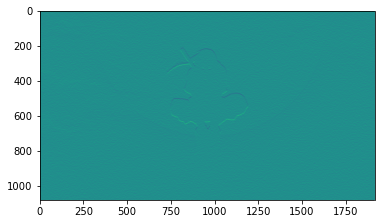

In [150]:
Sobel2 = conv(KS2,m,n,img2)

In [151]:
KS = KS1 + KS2

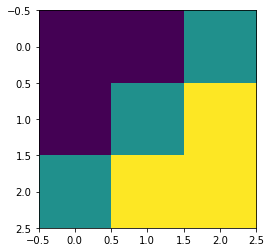

In [152]:
plt.imshow(KS)

[[ 697.30176383  835.35466429  717.96900048 ...  635.75583716
   977.78611307  142.77522818]
 [ 203.3126098   192.28610387  -88.75644554 ... -260.92245046
    48.51721117 -823.99397218]
 [ 344.18123355  360.75489958  126.46635624 ... -909.44700975
  -102.50618675 -475.20483384]
 ...
 [ 277.18529187  371.45462274  -92.02219854 ...  306.90616857
    26.06739903  308.67402372]
 [-307.89149838 -328.79297213 -149.99937257 ...  -52.95718215
  -251.71422195  110.72516436]
 [-319.65629569 -171.65370962  -34.31952548 ...   40.44797961
   167.17366879  127.83104672]]


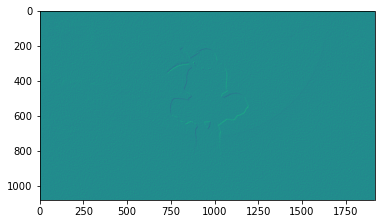

In [153]:
conv(KS,m,n,img2)

### Edge Detection Using Laplace Kernel


A Laplace Kernel is given by:
 $ K_{Laplace} = \begin{bmatrix} 
0 & -1 & 0\\
-1 & 4 & -1 \\
0 & -1 & 0
 \end{bmatrix} $

In [154]:
KLaplace = np.array([[ 0, -1, 0],
[-1, 4, -1],
[0, -1, 0]])


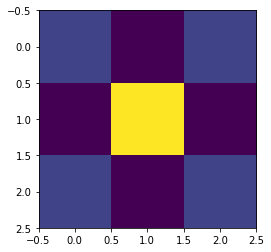

In [156]:
plt.imshow(KLaplace)

[[ 420.71424031  619.77299781  351.82078339 ...  469.2934274
  -360.20138494  874.50035482]
 [-407.86161807 -306.41457871  254.19898331 ... -501.82423983
   556.80371846  -80.15938494]
 [ 458.22137253 -240.33419126  348.00017166 ...  372.48714709
  -484.27159462  373.55145271]
 ...
 [ 123.28711577 -324.28301364  134.34787777 ...  645.36638494
  -378.40401783  376.33078245]
 [ 463.89596399  200.32439995  -21.14919577 ...   79.13214372
   418.38877591 -580.89246231]
 [-530.70404108  -95.47217123 -149.01953222 ... -353.88115279
  -168.63866902  466.69267325]]


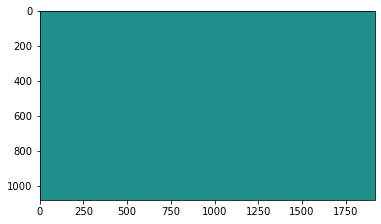

In [155]:
conv(KLaplace, m,n, img2)